In [2]:
]add PyPlot

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [======================>                  Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [4]:
using PyPlot

In [5]:
N = 10

10

In [6]:
x = [(i-1)*(2pi/N) for i in 1:N]

10-element Array{Float64,1}:
 0.0
 0.6283185307179586
 1.2566370614359172
 1.8849555921538759
 2.5132741228718345
 3.141592653589793
 3.7699111843077517
 4.39822971502571
 5.026548245743669
 5.654866776461628

In [7]:
y = [(j-1)*(2pi/N) for j in 1:N]

10-element Array{Float64,1}:
 0.0
 0.6283185307179586
 1.2566370614359172
 1.8849555921538759
 2.5132741228718345
 3.141592653589793
 3.7699111843077517
 4.39822971502571
 5.026548245743669
 5.654866776461628

In [8]:
sinx = sin.(x)

10-element Array{Float64,1}:
  0.0
  0.5877852522924731
  0.9510565162951535
  0.9510565162951536
  0.5877852522924732
  1.2246467991473532e-16
 -0.587785252292473
 -0.9510565162951535
 -0.9510565162951536
 -0.5877852522924734

In [9]:
cosy = cos.(y)

10-element Array{Float64,1}:
  1.0
  0.8090169943749475
  0.30901699437494745
 -0.30901699437494734
 -0.8090169943749473
 -1.0
 -0.8090169943749475
 -0.30901699437494756
  0.30901699437494723
  0.8090169943749473

In [10]:
z=sinx+cosy

10-element Array{Float64,1}:
  1.0
  1.3968022466674206
  1.260073510670101
  0.6420395219202063
 -0.2212317420824741
 -0.9999999999999999
 -1.3968022466674204
 -1.260073510670101
 -0.6420395219202064
  0.22123174208247398

In [11]:
U=x.*y

10-element Array{Float64,1}:
  0.0
  0.3947841760435743
  1.5791367041742972
  3.553057584392169
  6.316546816697189
  9.869604401089358
 14.212230337568675
 19.34442462613514
 25.266187266788755
 31.977518259529518

In [12]:
function secondDerivative(f::Function,x::Number,h::Number)::Number
    return (1/h^2)*(f(x+h)-2f(x)+f(x-h))
end

secondDerivative (generic function with 1 method)

In [13]:
NegSinx=[secondDerivative(sin,x_i,2pi/N) for x_i in x]

10-element Array{Float64,1}:
  0.0
 -0.5687005759445941
 -0.9201768612999934
 -0.9201768612999937
 -0.5687005759445938
  0.0
  0.5687005759445938
  0.9201768612999937
  0.9201768612999937
  0.5687005759445943

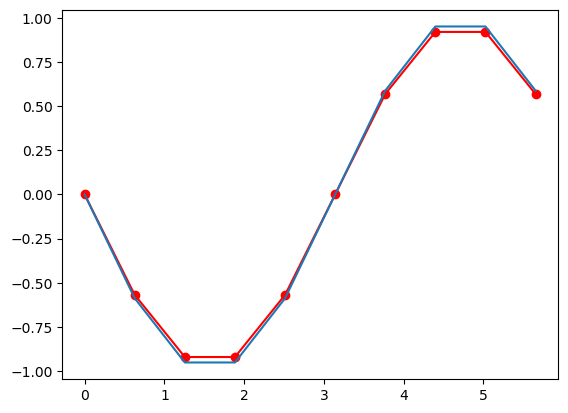

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149c349d0>

In [14]:
plot(x,NegSinx,"r-o")
plot(x,-1*sin.(x))

In [15]:
function dudx(u::Array, i::Int, j::Int)
    # You might need to be carefull at the boundaries and use if statements 
    # so that i+1 and i-1 don't go out of bounds
    h=2pi/N
    if i==1 
        du = (u[i+1,j]-u[i,j])/h
    elseif i==N
        du = (u[i,j]-u[i-1,j])/h
    else
        du = u[i+1,j]-u[i-1,j]/(2h)
    end
    return du
end
    

dudx (generic function with 1 method)

In [16]:
function dudy(u::Array,i::Int,j::Int)
    h=2pi/N
    if j==1 
        du = (u[i,j+1]-u[i,j])/h
    elseif j==N
        du = (u[i,j]-u[i,j-1])/h
    else
        du = u[i,j+1]-u[i,j-1]/(2h)
    end    
    return du

end

dudy (generic function with 1 method)

In [17]:
for i in 1:N
    for j in 1:N
    U[i,j]=dudx(U,i,j)+ dudy(U,i,j)
    end
    
end

BoundsError: BoundsError: attempt to access 10-element Array{Float64,1} at index [1, 2]

In [18]:
dsindx=zeros(N)
dcosdy=zeros(N)
for i in 1:N
    for j in 1:N
        dsindx[i,j]=dudx(sinx,i,j)
        dcosdx[i,j]=dudy(cosy,i,j)
    end
end

BoundsError: BoundsError: attempt to access 10-element Array{Float64,1} at index [1, 2]